<h2 align="center"> Univariate Linear Regression </h2>

### Load the Data and Libraries
---

In [1]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
data = pd.read_csv('bike_sharing_data.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Visualize the Data
---

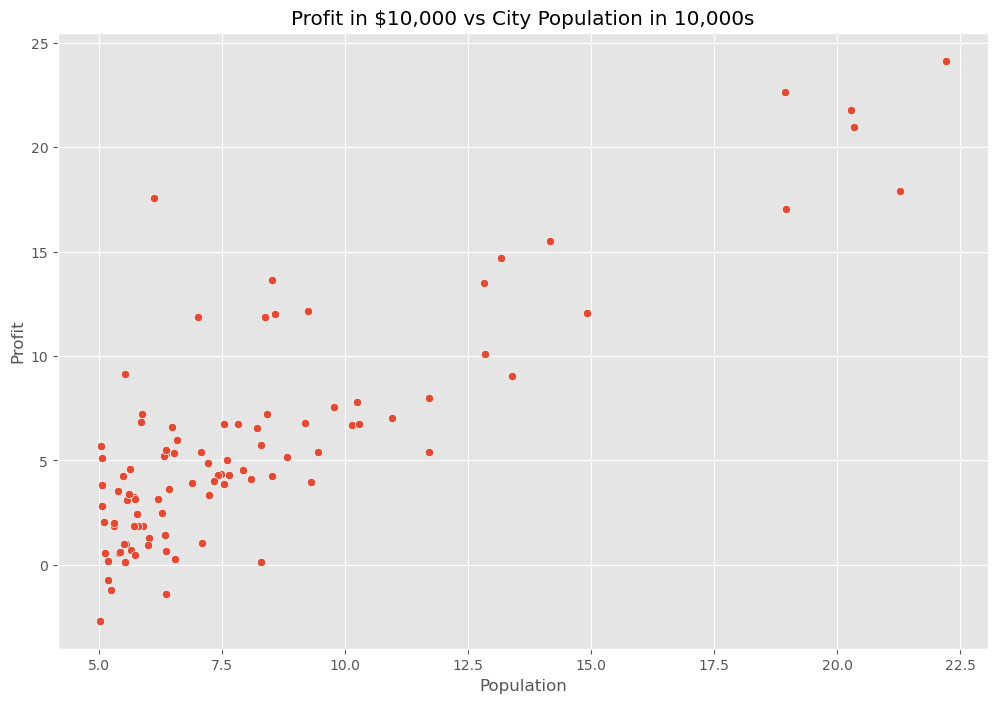

In [5]:
ax = sns.scatterplot(x = 'Population', y = 'Profit', data = data)
ax.set_title('Profit in $10,000 vs City Population in 10,000s');

### Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [6]:
def costfunction(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y)**2
    
    return 1 / (2 * m)* np.sum(error)

In [7]:
m = data.Population.values.size
X = np.append(np.ones((m, 1)), data.Population.values.reshape(m,1), axis = 1)
y = data.Profit.values.reshape(m,1)
theta = np.zeros((2,1))

costfunction(X, y, theta)

32.072733877455676

### Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [8]:
def gradientdescent(X, y, theta, alpha, iterations):
    m = len(y)
    costs =[]
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(), (y_pred - y))
        theta -= alpha * 1/m * error
        costs.append(costfunction(X, y, theta))
    return theta, costs

In [9]:
theta, costs = gradientdescent(X, y, theta, alpha = 0.01, iterations = 2000)
print('h(x) = {} + {}x1'.format(str(round(theta[0,0],2)),
                               str(round(theta[1,0],2))))

h(x) = -3.79 + 1.18x1


### Visualising the Cost Function $J(\theta)$
---

In [10]:
from mpl_toolkits.mplot3d import Axes3D

In [11]:
theta0 = np.linspace(-10, 10, 100)
theta1 = np.linspace(-1, 4, 100)

costvalues = np.zeros((len(theta0), len(theta1)))

for i in range(len(theta0)):
    for j in range(len(theta1)):
        t = np.array([theta0[i], theta1[j]])
        costvalues[i,j] = costfunction(X,y, t)

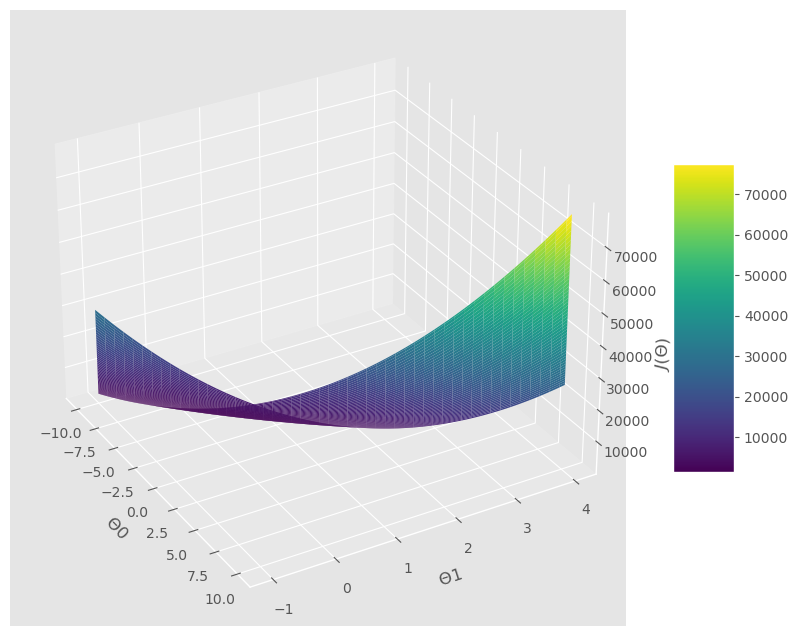

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot
surf = ax.plot_surface(theta0, theta1, costvalues, cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel('$\Theta0$')
plt.ylabel('$\Theta1$')
ax.set_zlabel('$J(\Theta)$')
ax.view_init(30, 330)
plt.show()

### Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

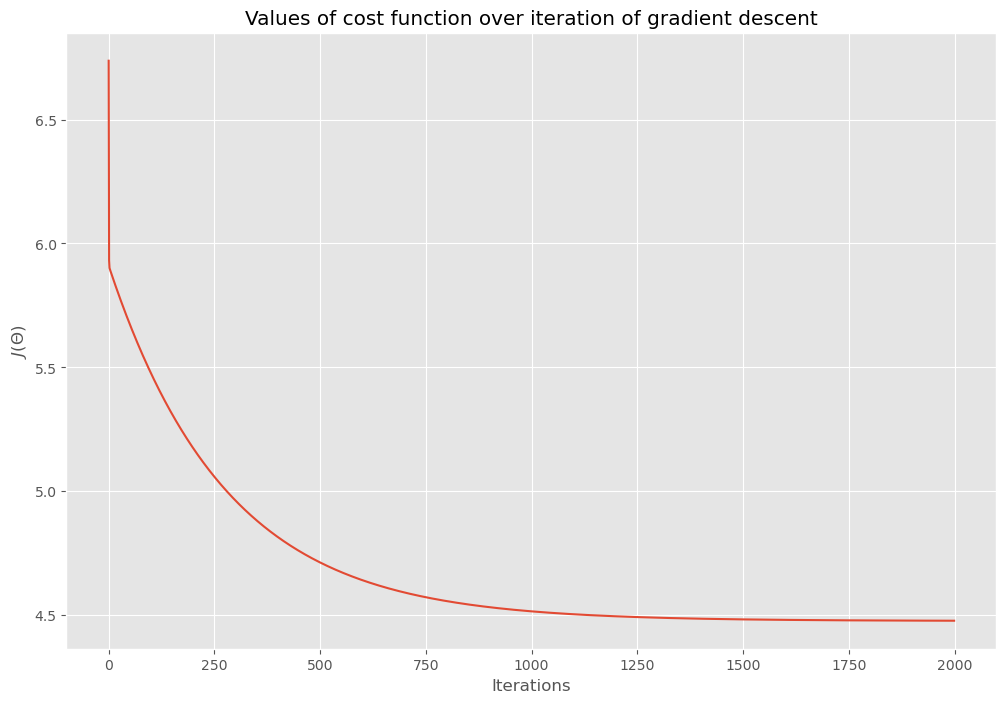

In [14]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('$J(\Theta)$')
plt.title('Values of cost function over iteration of gradient descent');

### Training Data with Linear Regression Fit
---

In [15]:
theta.shape

(2, 1)

In [16]:
theta

array([[-3.78806857],
       [ 1.18221277]])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


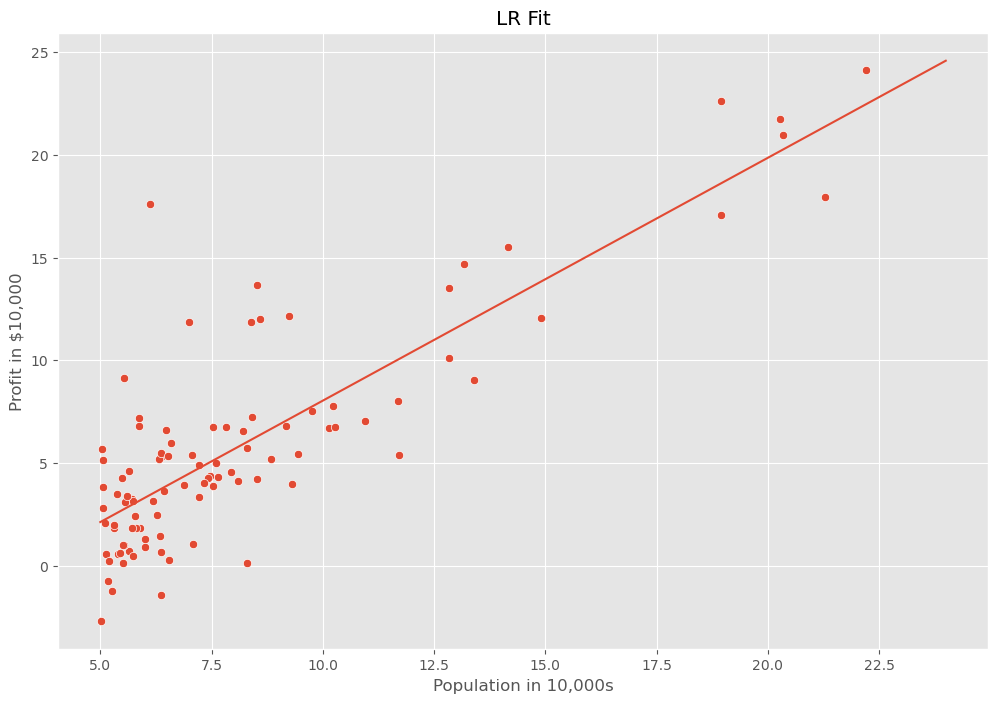

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

theta = np.squeeze(theta)
sns.scatterplot(x='Population', y='Profit', data=data)

xval = [x for x in range(5, 25)]
yval = [(x * theta[1] + theta[0]) for x in xval]
sns.lineplot(x=xval, y=yval)

plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in $10,000')
plt.title('LR Fit')
plt.show()

### Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$

In [19]:
def predict(x, theta):
    y_pred = np.dot(theta.transpose(),x)
    return y_pred

In [20]:
y_pred1 = predict(np.array([1,4]), theta) * 10000
print( " For a population of 40k people, the model predicts a profit of $" + str(round(y_pred1,0)))

 For a population of 40k people, the model predicts a profit of $9408.0


In [21]:
y_pred2 = predict(np.array([1,8.3]), theta) * 10000
print( " For a population of 83k people, the model predicts a profit of $" + str(round(y_pred2,0)))

 For a population of 83k people, the model predicts a profit of $60243.0
